In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
data_dir = "/run/media/machfudh/Data Manjaro/"
data_dir

'/run/media/machfudh/Data Manjaro/'

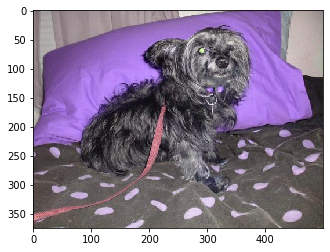

In [3]:
DATADIR ="Dataset/PetImages"
DATADIR = os.path.join(data_dir,DATADIR)
CATEGORIES = ["Dog","Cat"]

for categori in CATEGORIES:
    path = os.path.join(DATADIR, categori)
    for img in os.listdir(path):
#         img_array = cv2.imread(os.path.join(path,img))
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [4]:
print(img_array.shape)

(375, 500, 3)


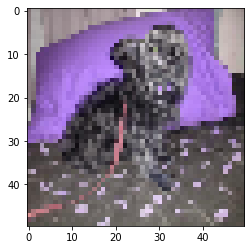

In [5]:
IMG_SIZE = 50

new_img_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_img_array, cmap="gray")
plt.show()

In [6]:
training_data =[]

def create_training_data():
    for categori in CATEGORIES:
        path = os.path.join(DATADIR, categori)
        class_num = CATEGORIES.index(categori)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_img_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_img_array, class_num])
            except Exception as e:
                pass
    
create_training_data()    

In [7]:
print(len(training_data))

24946


In [8]:
import random

random.shuffle(training_data)

In [9]:
for sampel, label in training_data[:10]:
    print(label)

0
0
1
1
0
0
1
0
0
0


In [10]:
X =[]
y=[]

for features, label in training_data:
    X.append(features)
    y.append(label)
    
# X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE,1)

In [11]:
X[0]

array([[ 33,  28,  30, ...,  39,  31,  34],
       [ 28,  28,  30, ...,  26,  33,  27],
       [ 32,  37,  30, ...,  28,  41,  25],
       ...,
       [179, 153, 193, ..., 136, 141, 145],
       [173, 163, 162, ..., 143, 150, 178],
       [163, 157, 174, ..., 161, 172, 183]], dtype=uint8)

In [12]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [13]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)
X[0]

array([[ 92,  86, 101, ...,  38,  39,  37],
       [ 91,  96, 107, ...,  46,  35,  39],
       [ 89,  98, 117, ...,  37,  31,  27],
       ...,
       [204, 219, 231, ..., 247, 240, 242],
       [202, 218, 228, ..., 252, 247, 248],
       [205, 219, 224, ..., 253, 249, 248]], dtype=uint8)